# Analysing Disneyland California Reviews
## Introduction

Today we are going to go over what our Disneyland guest at the California location are saying about the park. We have a dataset from Kaggle that was gathered by Arush Chillar. Here are the columns it contains.

**---Columns---**
- Review_ID
- **Rating**
- Year_Month
- Reviewer_Location
- **Review_Text**
- **Branch**

We will mainly be focusing on the Review_Text and Branch columns today. Then the Rating column for the last visual. The dataset has been cleaned and all necassary column values are present. Let's create 3 visualizations to help us understand the customers main talking points.

## Visualizing The Data
### Word Cloud

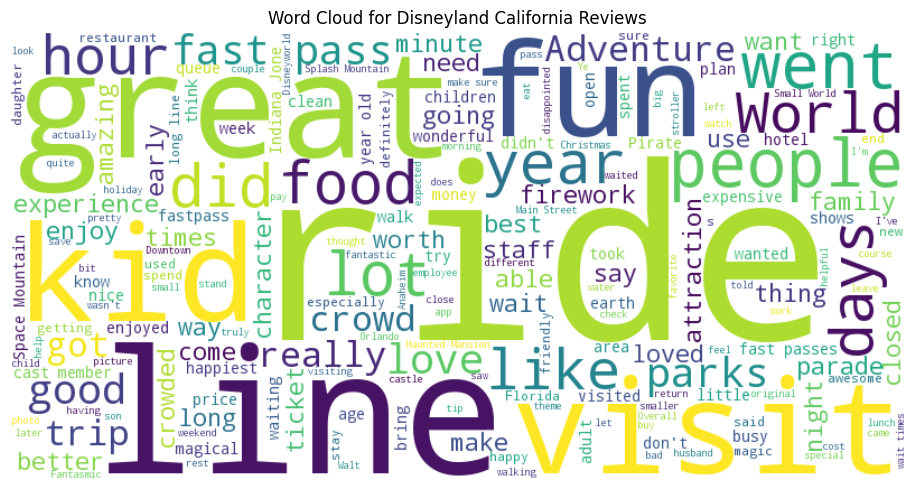

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

# Load the dataset
df = pd.read_csv('DisneylandReviews.csv')

# Filter for Disneyland California
california_reviews = df[df['Branch'] == 'Disneyland_California']

# Combine all review text into a single string
text_data = " ".join(review for review in california_reviews.Review_Text)

# Define stopwords
stopwords = set(ENGLISH_STOP_WORDS)
stopwords.update(['disneyland', 'park', 'california', 'disney', 'place', 'time', 'day', 'just'])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text_data)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Disneyland California Reviews')
plt.tight_layout()

### Explanation
Of course, the biggest talking point from guest reviews is about the rides. But the biggest insight we get is from the biggest positive word we see, "great". We can see alot of positive words taking up most of the word cloud. So, we can assume that the rides are getting a positive response from our audience. This helps give us a nice overview of where most of our guest fall on the spectrum of positive/negative.

### Frequency Count

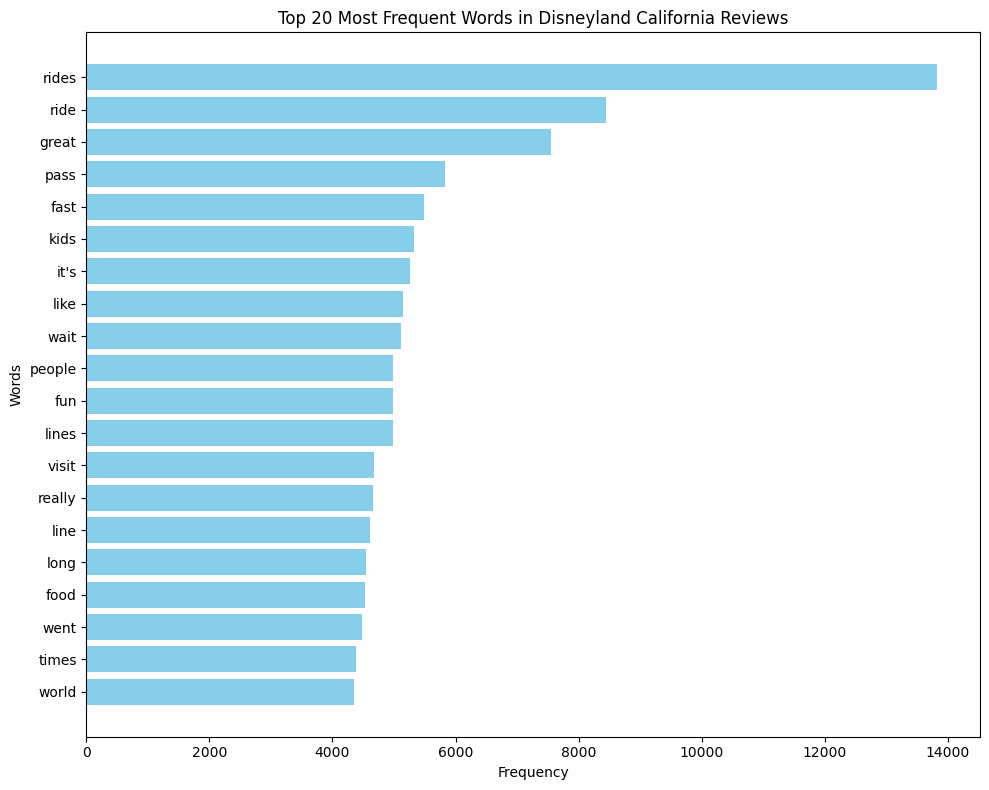

In [13]:
# Tokenization and cleaning
words = text_data.lower().split()
# Remove punctuation and stopwords
cleaned_words = [word.strip(string.punctuation) for word in words]
cleaned_words = [word for word in cleaned_words if word not in stopwords and word != '']

# Count frequencies
word_counts = Counter(cleaned_words)
most_common_words = word_counts.most_common(20)

# Prepare data for plotting
words_list, counts_list = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(words_list, counts_list, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words in Disneyland California Reviews')
plt.gca().invert_yaxis()
plt.tight_layout()

### Explanation
This helps focus our search a little bit. We see that "ride(s)" are brought up around **3 times more** than other words. "Great" is our next word, this was the same result from the word cloud. We also can see "pass" which may tell us that the fast pass is getting good reviews. "fast" can be talking about a multitude of things, fast rides, fast pass, fast line. "kids" is a good find because we want our main audience to cater towards children, so the reviews talking about the kids experience is telling that we are on the right track. Go down towards the bottom, and we can see the word "long". Now this is the only negative word we can see on this list so that's good, but long most likely is talking about our lines. One thing you'll notice is the fact that "line" and "long" have almost the same word count. This could mean that everytime "long" shows up, "line" comes right after. Now that doesn't mean that's correct but something good to keep in mind.

### Frequency Count (Negative Reviews)

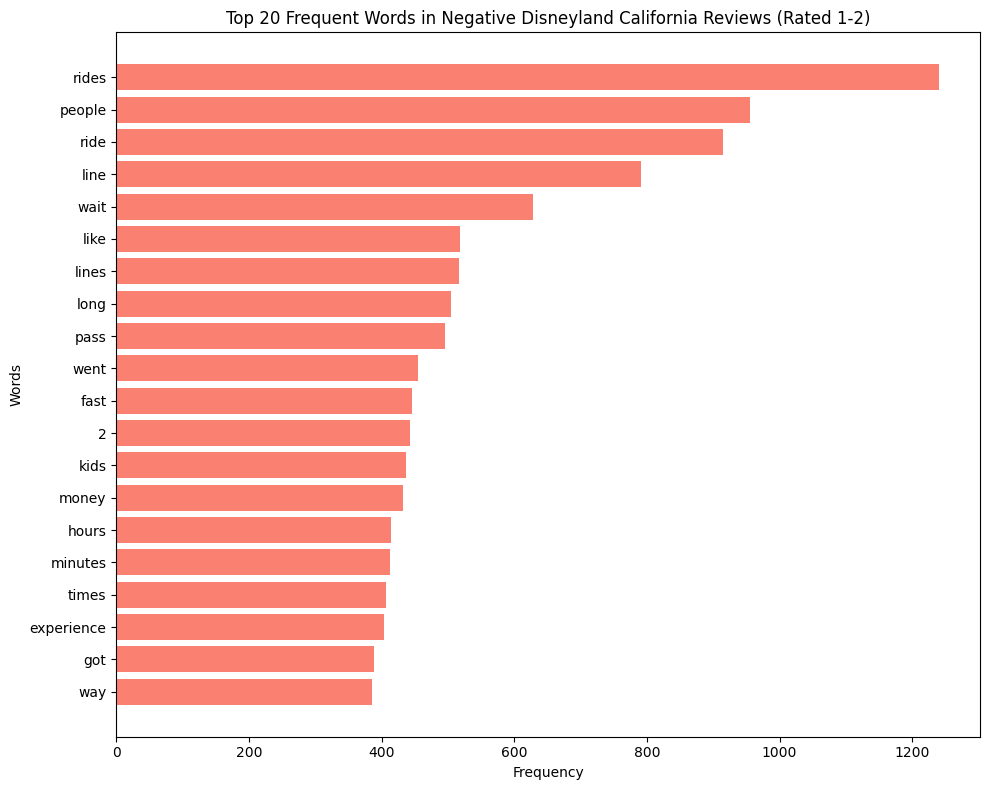

In [26]:
# Filter for Disneyland California AND Negative Ratings (1 or 2)
negative_california_reviews = df[(df['Branch'] == 'Disneyland_California') & (df['Rating'].isin([1, 2]))]

# Combine all review text
text_data = " ".join(review for review in negative_california_reviews.Review_Text)

# Tokenization and cleaning
words = text_data.lower().split()
# Remove punctuation and stopwords
cleaned_words = [word.strip(string.punctuation) for word in words]
cleaned_words = [word for word in cleaned_words if word not in stopwords and word != '']

# Count frequencies
word_counts = Counter(cleaned_words)
most_common_words = word_counts.most_common(20)

# Prepare data for plotting
words_list, counts_list = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(words_list, counts_list, color='salmon')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Frequent Words in Negative Disneyland California Reviews (Rated 1-2)')
plt.gca().invert_yaxis()
plt.tight_layout()

### Explanation
This tells us alot. Even though the list may seem identical to the previous one, knowing these come from negative reviews gives us context. "rides" is still number 1, which means, even if negative or positive, people tend to think about the ride quality when they leave Disneyland, and rightfully so. "people" comes up next, which tells us that there are times when guest may not have a pleasant experience with others. Hot weather and long lines will make anyone crazy. Speaking of long lines, we see that "lines" and "long" are right next to each other again which farther supports our hypothesis that when people bring up "long", they are talking about long lines. If you look towards the bottom, we can see "hours", "minutes", and "times". These are time based words and are most likely talking about the lines. Gathering all this insight gives us this conclusion. When it comes to negative reviews, **the biggest customer complaints are for the long lines for the rides and the people guest come across.**